1. Clean the Text data - Chaitanya
2. calculate the Frequency 
3. Profitibility calcultion - Hawei
4. Merge teh 2 & 3 and create a final ranking 

# File created for parallel execution

In [226]:
# to remove teh printing barrier
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [254]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import clear_output

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [255]:
import pandas as pd
import numpy as np
import re 


In [256]:
DIR_PATH = "/content/drive/MyDrive/SPM_files/"

# Profitability Analysis
df = pd.read_csv(DIR_PATH + "profitability_data.csv")


In [257]:
df.shape

(506, 10)

In [258]:
df.head()

,Company_Key,year,profitability,Company_Name,profitability_next_1,profitability_next_2,profitability_next_3,change_next_1,change_next_2,change_next_3
0,764622,2011,0.0561,PINNACLE WEST CAPITAL CORP,0.0707,0.0621,0.0519,25.88,10.69,-7.51
1,764622,2012,0.0707,PINNACLE WEST CAPITAL CORP,0.0621,0.0519,0.0753,-12.07,-26.53,6.59
2,764622,2013,0.0621,PINNACLE WEST CAPITAL CORP,0.0519,0.0753,0.0733,-16.44,21.22,17.92
3,764622,2014,0.0519,PINNACLE WEST CAPITAL CORP,0.0753,0.0733,0.0932,45.07,41.12,79.60
4,764622,2015,0.0753,PINNACLE WEST CAPITAL CORP,0.0733,0.0932,0.0668,-2.72,23.80,-11.36


In [259]:
DIR_PATH = "/content/drive/MyDrive/SPM_files/"
df_final = pd.read_csv(DIR_PATH + "final_df_v2.csv")

In [260]:
df_final.describe()

,Company_Key,Year,operation_percentage,negative_percentage,credit_percentage
count,8.300000e+02,830.000000,830.000000,598.000000,830.000000
mean,8.735917e+05,2016.428916,0.012731,0.018420,0.002470
std,5.325722e+05,3.049512,0.003603,0.004572,0.002742
min,4.904000e+03,2011.000000,0.003567,0.005380,0.000000
25%,3.525410e+05,2014.000000,0.009780,0.016157,0.001150
50%,1.021635e+06,2017.000000,0.012743,0.018644,0.001779
75%,1.317630e+06,2019.000000,0.014995,0.021384,0.002771
max,1.783400e+06,2021.000000,0.025175,0.030543,0.033586


In [261]:
df_final.head(2)

,Company_Key,Quarter_details,Year,filing_type,Text_data_cleaned,operation_percentage,negative_percentage,credit_percentage,compamy_name
0,1126956,QTR4,2011,10-K,0001126956 000074 20111121 lacledegroupform10 ...,0.015983,0.018151,0.001653,LACLEDE GROUP INC
1,1126956,QTR4,2011,10-K,0001126956 000075 20111121 lacledegasfor10 k20...,0.019980,0.017551,0.001041,LACLEDE GAS CO


In [263]:
df_final[df_final['Company_Key']==4904].sample(5)

,Company_Key,Quarter_details,Year,filing_type,Text_data_cleaned,operation_percentage,negative_percentage,credit_percentage,compamy_name
76,4904,QTR1,2015,10-K,0000004904 000008 20150220 ye14aep10k american...,0.014946,0.018254,0.001718,AMERICAN ELECTRIC POWER CO INC
303,4904,QTR1,2019,10-K,0000004904 000009 20190221 aep10klegal20184q a...,0.017938,0.019350,0.001211,AMERICAN ELECTRIC POWER CO INC
63,4904,QTR1,2011,10-K,nproc type 2001 clear norigin name webmast nor...,0.018130,0.018303,0.001066,OHIO POWER CO
65,4904,QTR1,2011,10-K,nproc type 2001 clear norigin name webmast nor...,0.018127,0.018300,0.001066,SOUTHWESTERN ELECTRIC POWER CO
74,4904,QTR1,2014,10-K,0000004904 000037 20140328 opcopirfunding20131...,0.015173,0.008875,0.002863,OHIO PHASE-IN-RECOVERY FUNDING LLC


In [264]:
df_final.drop_duplicates(inplace=True)

In [265]:
df_final.shape

(830, 9)

In [12]:
# DIR_PATH = "/content/drive/MyDrive/SPM_files/"
# df_final_2 = pd.read_csv(DIR_PATH + "df_msiing_cleaned.csv")

In [13]:
# df_final_2.shape

(232, 8)

In [19]:
# df_final_2.rename(columns={'year':'Year','company':'compamy_name'}, inplace=True)

In [20]:
# df_final_4 = pd.concat([df_final,df_final_2])

In [21]:
# df_final_4.shape

(830, 11)

In [144]:
# df_final_4.drop_duplicates()

In [25]:
# df_final_4[['Company_Key', 'Quarter_details', 'Year', 'filing_type',
#        'Text_data_cleaned', 'operation_percentage', 'negative_percentage',
#        'credit_percentage', 'compamy_name']].to_csv(DIR_PATH + "final_df_v2.csv", index=None)



In [99]:
# df_final_4 = df_final_4[['Company_Key', 'Quarter_details', 'Year', 'filing_type',
#        'Text_data_cleaned', 'operation_percentage', 'negative_percentage',
#        'credit_percentage', 'compamy_name']]

In [266]:
df.head(2)

,Company_Key,year,profitability,Company_Name,profitability_next_1,profitability_next_2,profitability_next_3,change_next_1,change_next_2,change_next_3
0,764622,2011,0.0561,PINNACLE WEST CAPITAL CORP,0.0707,0.0621,0.0519,25.88,10.69,-7.51
1,764622,2012,0.0707,PINNACLE WEST CAPITAL CORP,0.0621,0.0519,0.0753,-12.07,-26.53,6.59


In [103]:
# df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [267]:
df_final.columns

Index(['Company_Key', 'Quarter_details', 'Year', 'filing_type',
       'Text_data_cleaned', 'operation_percentage', 'negative_percentage',
       'credit_percentage', 'compamy_name'],
      dtype='object')

In [268]:
df3 = df_final.merge(df, left_on=['Company_Key','Year'] , right_on= ['Company_Key',  'year'])

In [269]:
df3.sample(2)

,Company_Key,Quarter_details,Year,filing_type,Text_data_cleaned,operation_percentage,negative_percentage,credit_percentage,compamy_name,year,profitability,Company_Name,profitability_next_1,profitability_next_2,profitability_next_3,change_next_1,change_next_2,change_next_3
30,1130464,QTR1,2013,10-K,0001130464 000071 20130225 bkh10k12312012 nbkh...,0.015401,0.021891,0.004067,BLACK HILLS CORP /SD/,2013,0.0231,BLACK HILLS CORP /SD/,0.0145,-0.0097,0.0335,-37.07,-141.87,45.16
460,1368265,NaN,2012,NaN,0001047469 002470 20120312 a2207799z10 nunit s...,0.007406,NaN,0.001678,CLEAN ENERGY FUELS CORP,2012,-0.2870,CLEAN ENERGY FUELS CORP.,-0.1988,-4.2728,-0.0642,-30.71,1388.92,-77.64


In [270]:
df3['isMissing'] = np.where(df3['Text_data_cleaned'].isnull(), 1,0)

In [271]:
df3['isMissing'].value_counts()

0    486
Name: isMissing, dtype: int64

In [272]:
df3 = df3[df3['isMissing']==0]

In [273]:
df3.columns

Index(['Company_Key', 'Quarter_details', 'Year', 'filing_type',
       'Text_data_cleaned', 'operation_percentage', 'negative_percentage',
       'credit_percentage', 'compamy_name', 'year', 'profitability',
       'Company_Name', 'profitability_next_1', 'profitability_next_2',
       'profitability_next_3', 'change_next_1', 'change_next_2',
       'change_next_3', 'isMissing'],
      dtype='object')

In [36]:
# col = ['Company_Key', 
#         'operation_percentage', 'compamy_name', 'company', 'industry', 'year', 'isMissing']

In [29]:
# df3[col].to_csv(DIR_PATH + "missing_data.csv", index=None)

In [274]:
df3.shape

(486, 19)

In [275]:
df3[['Company_Name','compamy_name','year']].head()

,Company_Name,compamy_name,year
0,SPIRE INC,LACLEDE GROUP INC,2011
1,SPIRE INC,LACLEDE GAS CO,2011
2,SPIRE INC,LACLEDE GROUP INC,2012
3,SPIRE INC,LACLEDE GAS CO,2012
4,SPIRE INC,LACLEDE GROUP INC,2013


In [276]:
# removing the companyies with the subsidary
df4 = df3[~df3['compamy_name'].isin(['Entergy Gulf States Reconstruction Funding I, LLC',
                                     'Entergy Texas Restoration Funding, LLC','Entergy Arkansas Restoration Funding, LLC','Entergy Arkansas Restoration Funding, LLC','AEP Texas Central Transition Funding III LLC','OHIO PHASE-IN-RECOVERY FUNDING LLC','Appalachian Consumer Rate Relief Funding LLC','LACLEDE GAS CO',
        'OHIO POWER CO',
       'AEP Texas Central Transition Funding II LLC',
       'AEP Texas Central Transition Funding III LLC',
       'OHIO PHASE-IN-RECOVERY FUNDING LLC',
       'Appalachian Consumer Rate Relief Funding LLC',
       'ENTERGY ARKANSAS INC',
       'Entergy Gulf States Reconstruction Funding I, LLC',
       'Entergy Texas Restoration Funding, LLC',
       'Entergy Arkansas Restoration Funding, LLC',
       'ENTERGY LOUISIANA INVESTMENT RECOVERY FUNDING I, L.L.C.',
 
       'Entergy New Orleans Storm Recovery Funding I, L.L.C.',
       'Entergy Louisiana, LLC'])]

In [277]:
df9 = df3[df3['Company_Key'].isin([65984, 4904, 1126956, 65984])]


In [278]:
df9[['Company_Name','compamy_name','Year']]['compamy_name'].unique()

array(['LACLEDE GROUP INC', 'LACLEDE GAS CO',
       'COLUMBUS SOUTHERN POWER CO /OH/',
       'AMERICAN ELECTRIC POWER CO INC', 'INDIANA MICHIGAN POWER CO',
       'APPALACHIAN POWER CO', 'OHIO POWER CO',
       'PUBLIC SERVICE CO OF OKLAHOMA', 'SOUTHWESTERN ELECTRIC POWER CO',
       'AEP Texas Central Transition Funding II LLC',
       'AEP Texas Central Transition Funding III LLC',
       'OHIO PHASE-IN-RECOVERY FUNDING LLC',
       'Appalachian Consumer Rate Relief Funding LLC',
       'ENTERGY ARKANSAS INC',
       'Entergy Gulf States Reconstruction Funding I, LLC',
       'Entergy Texas Restoration Funding, LLC',
       'Entergy Arkansas Restoration Funding, LLC',
       'ENTERGY LOUISIANA INVESTMENT RECOVERY FUNDING I, L.L.C.',
       'ENTERGY CORP /DE/', 'SPIRE INC',
       'Entergy New Orleans Storm Recovery Funding I, L.L.C.',
       'Entergy Louisiana, LLC'], dtype=object)

In [279]:
df9[['Company_Name','compamy_name','Year']]['Company_Name'].unique()

array(['SPIRE INC', 'AMERICAN ELECTRIC POWER CO INC', 'ENTERGY CORP /DE/'],
      dtype=object)

In [280]:
df5 = df4.drop_duplicates(['Text_data_cleaned'])

In [281]:
df5.shape

(431, 19)

In [283]:
df5.head(2)

,Company_Key,Quarter_details,Year,filing_type,Text_data_cleaned,operation_percentage,negative_percentage,credit_percentage,compamy_name,year,profitability,Company_Name,profitability_next_1,profitability_next_2,profitability_next_3,change_next_1,change_next_2,change_next_3,isMissing
0,1126956,QTR4,2011,10-K,0001126956 000074 20111121 lacledegroupform10 ...,0.015983,0.018151,0.001653,LACLEDE GROUP INC,2011,-0.1127,SPIRE INC,-0.0891,-0.0834,-0.0765,-20.87,-26.00,-32.10,0
2,1126956,QTR4,2012,10-K,0001126956 000080 20121119 lacledegroupform10 ...,0.007124,0.013886,0.009069,LACLEDE GROUP INC,2012,-0.0891,SPIRE INC,-0.0834,-0.0765,-0.0449,-6.48,-14.19,-49.65,0


In [284]:
df5[['compamy_name','year']].value_counts()

compamy_name                               year
ADVANCED DISPOSAL SERVICES                 2016    1
PERMA-FIX ENVIRONMENTAL SVCS               2012    1
PATTERN ENERGY GROUP INC                   2016    1
                                           2015    1
                                           2014    1
PACIFIC GAS & ELECTRIC Co                  2013    1
ORMAT TECHNOLOGIES INC                     2018    1
                                           2017    1
                                           2016    1
                                           2015    1
                                           2014    1
                                           2013    1
                                           2012    1
                                           2011    1
OGE ENERGY CORP.                           2018    1
                                           2017    1
                                           2016    1
                                           2015    

In [285]:
df3 = df5.copy()

## Ranking the records for company with most restructuring effects

In [286]:
# sort the records of the dataframe based on the operation_percentage (which emphasizes the restructuring effects) 

re_cpm_df = df3.sort_values("operation_percentage", ascending=False)
re_cpm_df.head()

,Company_Key,Quarter_details,Year,filing_type,Text_data_cleaned,operation_percentage,negative_percentage,credit_percentage,compamy_name,year,profitability,Company_Name,profitability_next_1,profitability_next_2,profitability_next_3,change_next_1,change_next_2,change_next_3,isMissing
48,92122,QTR1,2015,10-K,0000092122 000015 20150629 kx12312014 2014 nta...,0.020915,0.012591,0.002073,SOUTHERN CO,2015,0.0793,SOUTHERN CO,0.0735,0.0486,0.0489,-7.29,-38.74,-38.33,0
213,92122,QTR1,2016,10-K,0000092122 000126 20160226 kx12312015 ntabl co...,0.020484,0.012959,0.001905,SOUTHERN CO,2016,0.0735,SOUTHERN CO,0.0486,0.0489,0.1099,-33.93,-33.49,49.61,0
214,92122,QTR1,2017,10-K,0000092122 000007 20170222 kx12312016 ndocumen...,0.020260,0.012924,0.002614,ALABAMA POWER CO,2017,0.0486,SOUTHERN CO,0.0489,0.1099,0.1054,0.67,126.42,117.07,0
136,1161728,QTR1,2015,10-K,0001161728 000003 20150226 f10k 2014 form nfor...,0.020112,0.018483,0.001284,MGE ENERGY INC,2015,0.0266,MGE ENERGY INC,0.0403,0.0551,0.0346,51.44,107.03,29.89,0
47,92122,QTR1,2014,10-K,0000092122 000012 20140912 kx12312013 2013 nta...,0.020106,0.013023,0.002333,SOUTHERN CO,2014,0.0506,SOUTHERN CO,0.0793,0.0735,0.0486,56.55,45.14,-4.10,0


In [ ]:
# droping the duplicates
# re_cpm_df.drop_duplicates( keep='last', inplace=True)

In [287]:
re_cpm_df.reset_index(drop=True, inplace=True)
# re_cpm_df = re_cpm_df.head(round(re_cpm_df.shape[0] * 0.3))

In [288]:
re_cpm_df['is_restructuring'] = 0

In [289]:
re_cpm_df[:round(re_cpm_df.shape[0] * 0.3)+1]['is_restructuring'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [290]:
re_cpm_df.tail()

,Company_Key,Quarter_details,Year,filing_type,Text_data_cleaned,operation_percentage,negative_percentage,credit_percentage,compamy_name,year,profitability,Company_Name,profitability_next_1,profitability_next_2,profitability_next_3,change_next_1,change_next_2,change_next_3,isMissing,is_restructuring
426,1047862,NaN,2015,NaN,0001193125 054350 20150219 d821872d10k ntabl c...,0.005090,NaN,0.000705,CONSOLIDATED EDISON INC,2015,0.0052,CONSOLIDATED EDISON INC,0.0194,0.0405,0.0307,270.40,672.82,484.99,0,0
427,1130310,QTR1,2011,10-K,0001130310 000015 20110325 tbcform10 form dece...,0.004764,0.016883,0.019641,CENTERPOINT ENERGY TRANSITION BOND CO LLC,2011,0.0625,CENTERPOINT ENERGY INC,0.0219,-0.0303,-0.0300,-64.96,-148.42,-147.95,0,0
428,891532,NaN,2015,NaN,0001437749 006469 20150331 perma20141231 form ...,0.004485,NaN,0.000983,PERMA-FIX ENVIRONMENTAL SVCS,2015,-0.0631,PERMA FIX ENVIRONMENTAL SERVICES INC,-0.1442,-0.0977,-0.0946,128.54,54.83,49.83,0,0
429,922224,QTR1,2011,10-K,nproc type 2001 clear norigin name webmast nor...,0.003952,0.010891,0.018184,PPL ELECTRIC UTILITIES CORP,2011,0.0478,PPL CORP,0.0574,0.0544,0.0969,20.14,13.91,102.99,0,0
430,727273,QTR1,2013,10-K,0000727273 000008 20130315 form10k 2012 form y...,0.003845,0.014303,0.006961,CADIZ INC,2013,-24.7789,CADIZ INC,-17.5245,-25.1521,-16.9822,-29.28,1.51,-31.47,0,0


In [295]:
re_cpm_df['operation_percentage'].describe()

count    431.000000
mean       0.012522
std        0.003490
min        0.003845
25%        0.009685
50%        0.012291
75%        0.015109
max        0.020915
Name: operation_percentage, dtype: float64

In [296]:
re_cpm_df[re_cpm_df['is_restructuring']==1]['operation_percentage'].describe()

count    130.000000
mean       0.016723
std        0.001568
min        0.014719
25%        0.015368
50%        0.016391
75%        0.018031
max        0.020915
Name: operation_percentage, dtype: float64

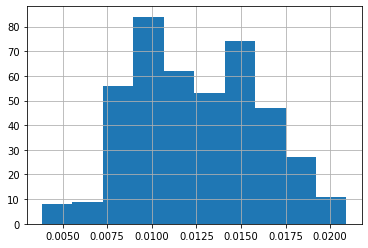

In [297]:
re_cpm_df['operation_percentage'].hist()

In [291]:
re_cpm_df.columns

Index(['Company_Key', 'Quarter_details', 'Year', 'filing_type',
       'Text_data_cleaned', 'operation_percentage', 'negative_percentage',
       'credit_percentage', 'compamy_name', 'year', 'profitability',
       'Company_Name', 'profitability_next_1', 'profitability_next_2',
       'profitability_next_3', 'change_next_1', 'change_next_2',
       'change_next_3', 'isMissing', 'is_restructuring'],
      dtype='object')

In [292]:
col = ['Company_Key', 'Quarter_details', 'Year', 'filing_type',
        'operation_percentage', 'negative_percentage',
       'credit_percentage', 'compamy_name', 'profitability',
        'profitability_next_1', 'profitability_next_2',
       'profitability_next_3', 'change_next_1', 'change_next_2',
       'change_next_3',  'is_restructuring']

In [293]:
re_cpm_df[col].head(2)

,Company_Key,Quarter_details,Year,filing_type,operation_percentage,negative_percentage,credit_percentage,compamy_name,profitability,profitability_next_1,profitability_next_2,profitability_next_3,change_next_1,change_next_2,change_next_3,is_restructuring
0,92122,QTR1,2015,10-K,0.020915,0.012591,0.002073,SOUTHERN CO,0.0793,0.0735,0.0486,0.0489,-7.29,-38.74,-38.33,1
1,92122,QTR1,2016,10-K,0.020484,0.012959,0.001905,SOUTHERN CO,0.0735,0.0486,0.0489,0.1099,-33.93,-33.49,49.61,1


In [ ]:
re_cpm_df[col]

In [253]:
re_cpm_df[col].to_csv(DIR_PATH + "restructuring_data.csv", index=None)